<a href="https://colab.research.google.com/github/deepakmelkani/DAA/blob/main/Transfer_Learning_Resnet_50.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Transfer Learning VGG 16 and VGG 19 using Keras

In [1]:
from tensorflow.compat.v1 import ConfigProto
from tensorflow.compat.v1 import InteractiveSession

config = ConfigProto()
config.gpu_options.per_process_gpu_memory_fraction = 0.5
config.gpu_options.allow_growth = True
session = InteractiveSession(config=config)

In [ ]:
# import the libraries as shown below

from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.resnet50 import ResNet50
#from keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob
#import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
# re-size all the images to this
IMAGE_SIZE = [224, 224]

train_path = '/content/drive/MyDrive/data/train'
valid_path = '/content/drive/MyDrive/data/test'


In [ ]:
# Import the ResNet50 library as shown below and add preprocessing layer to the front of VGG
# Here we will be using imagenet weights

resnet = ResNet50(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)




94781440/94765736 [==============================] - 0s 0us/step


In [ ]:
# don't train existing weights
for layer in resnet.layers:
    layer.trainable = False

In [ ]:
  # useful for getting number of output classes
folders = glob('/content/drive/MyDrive/data/train/*')

In [ ]:
# our layers - you can add more if you want
x = Flatten()(resnet.output)

In [ ]:
prediction = Dense(len(folders), activation='softmax')(x)

# create a model object
model = Model(inputs=resnet.input, outputs=prediction)

In [ ]:

# view the structure of the model
model.summary()


Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 230, 230, 3)  0           ['input_1[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 112, 112, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                                                                                              

In [ ]:
# tell the model what cost and optimization method to use
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)


In [ ]:
# Use the Image Data Generator to import the images from the dataset
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [ ]:
# Make sure you provide the same target size as initialied for the image size
training_set = train_datagen.flow_from_directory('/content/drive/MyDrive/data/train',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 1951 images belonging to 4 classes.


In [ ]:
test_set = test_datagen.flow_from_directory('/content/drive/MyDrive/data/test',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 18 images belonging to 4 classes.


In [ ]:
# fit the model
# Run the cell. It will take some time to execute
r = model.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=20,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  


Epoch 1/20
61/61 [==============================] - 256s 4s/step - loss: 3.0144 - accuracy: 0.3680 - val_loss: 1.3113 - val_accuracy: 0.5000
Epoch 2/20
61/61 [==============================] - 38s 615ms/step - loss: 1.0541 - accuracy: 0.5910 - val_loss: 1.2031 - val_accuracy: 0.6111
Epoch 3/20
61/61 [==============================] - 37s 609ms/step - loss: 1.1929 - accuracy: 0.5607 - val_loss: 2.0243 - val_accuracy: 0.3333
Epoch 4/20
61/61 [==============================] - 37s 610ms/step - loss: 0.8891 - accuracy: 0.6515 - val_loss: 0.8556 - val_accuracy: 0.7222
Epoch 5/20
61/61 [==============================] - 37s 611ms/step - loss: 0.7980 - accuracy: 0.6802 - val_loss: 0.8584 - val_accuracy: 0.6111
Epoch 6/20
61/61 [==============================] - 37s 608ms/step - loss: 0.8151 - accuracy: 0.6786 - val_loss: 0.8282 - val_accuracy: 0.6667
Epoch 7/20
61/61 [==============================] - 38s 618ms/step - loss: 1.1515 - accuracy: 0.6187 - val_loss: 1.0334 - val_accuracy: 0.6667
E

In [ ]:
import matplotlib.pyplot as plt

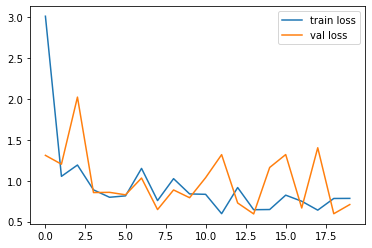

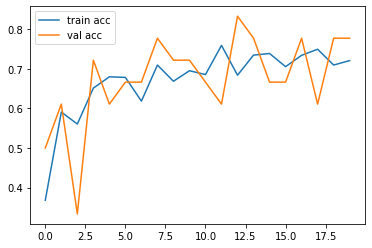

<Figure size 432x288 with 0 Axes>

In [ ]:
# plot the loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [ ]:
# save it as a h5 file

from tensorflow.keras.models import load_model
model.save('model_resnet50.h5')

In [ ]:

y_pred = model.predict(test_set)


In [ ]:
y_pred

array([[9.88976538e-01, 2.31583769e-07, 1.08530018e-02, 1.70187952e-04],
       [7.50453561e-04, 8.27750921e-01, 9.85469073e-02, 7.29517788e-02],
       [5.44033432e-03, 3.50389570e-01, 6.23454988e-01, 2.07150690e-02],
       [3.78702389e-05, 1.19560653e-04, 9.99559462e-01, 2.83071160e-04],
       [2.42509115e-02, 6.53962343e-05, 5.24738915e-02, 9.23209846e-01],
       [5.89301926e-04, 6.58380974e-04, 9.97093320e-01, 1.65899866e-03],
       [2.33194267e-04, 9.81880203e-02, 3.61308940e-02, 8.65447879e-01],
       [1.68821149e-04, 4.72849450e-07, 9.99829888e-01, 8.39502036e-07],
       [1.23424013e-03, 1.92498062e-02, 1.95584595e-01, 7.83931434e-01],
       [4.46204183e-04, 9.41228330e-01, 5.28027769e-04, 5.77973872e-02],
       [2.72493418e-02, 7.35563159e-01, 1.14590123e-01, 1.22597374e-01],
       [1.10091469e-06, 1.40146966e-07, 9.99960542e-01, 3.82149265e-05],
       [5.47542586e-04, 2.10272297e-01, 1.59146398e-01, 6.30033851e-01],
       [5.03397256e-04, 9.92246330e-01, 4.62725468e

In [ ]:
import numpy as np
y_pred = np.argmax(y_pred, axis=1)

In [ ]:
y_pred

array([0, 1, 2, 2, 3, 2, 3, 2, 3, 1, 1, 2, 3, 1, 3, 1, 2, 1])

In [ ]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image

In [ ]:
model=load_model('model_resnet50.h5')